## Fraud detection

**Goal**: To train a suitable model to correctly detect fraudulent credit card transactions.

**Data**: ([source](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)) Consists of information on credit card transactions. To keep confidentiality, most features have been transformed and named as V1, V2,...,V28, which are the prinicipal combonents from a PCA. Besides these features, this dataset also contains Time and Amount features. The Time feature is the time elapsed in seconds from the first transaction. The target variable is 'Class' where a value of 1 signifies a fraudulent case and 0 otherwise.

In [132]:
# importing required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, average_precision_score

In [133]:
# to suppress any warnings due to class/function calls from the modules

import warnings
warnings.filterwarnings('ignore')

In [134]:
# importing the data to a dataframe from a csv file

df = pd.read_csv('creditcard.csv')

In [135]:
# basic information from the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There seems to be no null or missing values.

In [136]:
df.duplicated().sum()

1081

In [137]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


The dataset contains 1081 duplicate rows. But without much background information, it is difficult to determine whether they are actually duplicate entries or failed transactions with the same feautures. On the other hand, having duplicate transactions at the exact same time is certainly odd. So due to the lack of information on the fetures, I have decided to keep the duplicate rows given that there is a very low portion of positive class from the dataset.

In [138]:
# df = df.drop_duplicates()

In [139]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [141]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This shows the highly imbalanced class column where only 0.172% of the transactions are fraudulent.

In [142]:
# creating a fraud frequency time series

# dividing the time column into bins and measuring the fraud counts for the respective bins

time_bins = np.linspace(min(df['Time']),max(df['Time']), 21)
counts = np.zeros(len(time_bins)-1)

i = 0
_ = df[df['Class'] == 1]['Time']

for x in _:

    if x > time_bins[i+1]:
        i += 1
    
    counts[i] += 1
     
fraud_series = pd.DataFrame({'Time': time_bins[1:].round(), 'Fraud cases': counts})

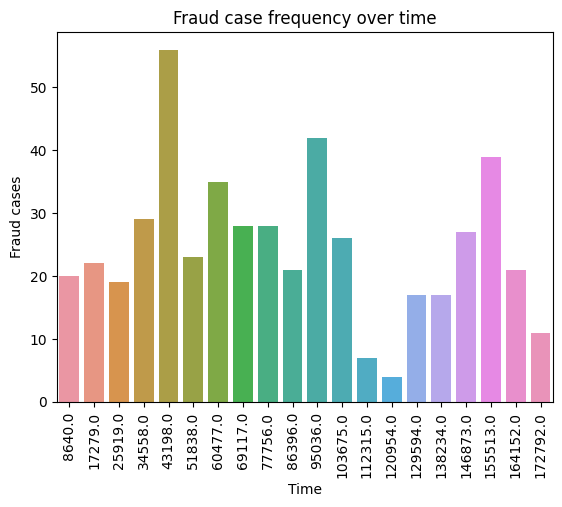

In [143]:
sns.barplot(data=fraud_series, x='Time', y='Fraud cases')
plt.title('Fraud case frequency over time')
plt.xticks(rotation=90);

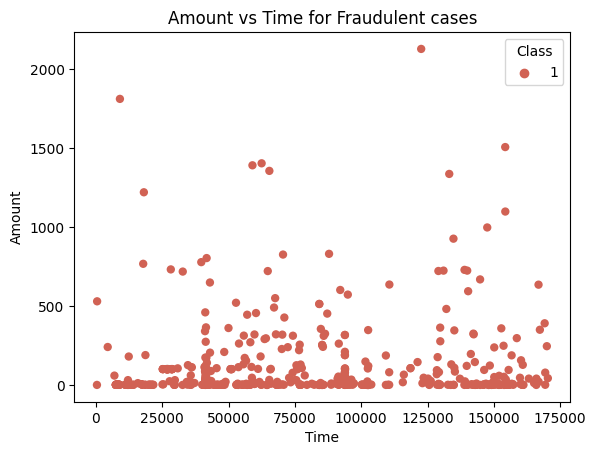

In [144]:
sns.scatterplot(data=df[df['Class']==1], x='Time', y='Amount', hue='Class', linewidth=0, palette=['#d16254'])
plt.title('Amount vs Time for Fraudulent cases');

In [145]:
# class counts for 0 amount transactions

df[df['Amount'] == 0]['Class'].value_counts()

Class
0    1798
1      27
Name: count, dtype: int64

In [146]:
# correlation coefficients between the features and the target class

df.corr()['Class'][:-1].abs().sort_values()

V22       0.000805
V23       0.002685
V25       0.003308
V15       0.004223
V26       0.004455
V13       0.004570
Amount    0.005632
V24       0.007221
V28       0.009536
Time      0.012323
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V6        0.043643
V2        0.091289
V5        0.094974
V9        0.097733
V1        0.101347
V18       0.111485
V4        0.133447
V11       0.154876
V7        0.187257
V3        0.192961
V16       0.196539
V10       0.216883
V12       0.260593
V14       0.302544
V17       0.326481
Name: Class, dtype: float64

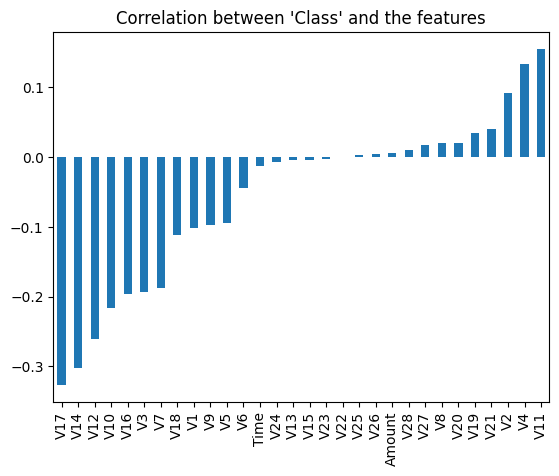

In [147]:
df.corr()['Class'][:-1].sort_values().plot(kind='bar')
plt.title('Correlation between \'Class\' and the features');

### Data preparation

The data is split into a training and a hold out test set in the ratio of 85% and 15% respectively. The target variable is the 'Class' column and the rest are the features set. The features are also scaled by standardization.

In [148]:
X = df.iloc[:,1:-1]
y = df['Class']

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic regression

Logistic regression is a statistical method that uses the logistic function (sigmoid function) to map predicted values to probabilities between 0 and 1 (binary classification). In order to account for the imbabalanced target variable, the hyperparameter 'class_weight' has been set to 'balanced'. This essentially gives for weightage to the minority class.

In [151]:
from sklearn.linear_model import LogisticRegression

# log_model = LogisticRegression()

In [152]:
# param_grid = {'penalty': ['elasticnet'],
#               'C': np.linspace(0.4,0.6,5),
#               'class_weight': ['balanced'],
#               'solver': ['saga'],
#               'l1_ratio': np.linspace(0.25,0.26,4)}

In [153]:
# grid = GridSearchCV(log_model, param_grid)

# grid.fit(scaled_X_train, y_train)

In [154]:
# grid.best_params_

In [155]:
log_model = LogisticRegression(penalty='elasticnet',
                               class_weight='balanced',
                               C=0.6,
                               l1_ratio=0.253333,
                               solver='saga')

In [156]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression(C=0.6, class_weight='balanced', l1_ratio=0.253333,
                   penalty='elasticnet', solver='saga')

In [157]:
# function to display all evaluation metrics
# it also returns certain metric scores to compare with other models

def metrics(model):

    y_pred = model.predict(scaled_X_test)
    y_proba = model.predict_proba(scaled_X_test)[:, 1]

    print('Confusion Matrix:')
    ConfusionMatrixDisplay.from_estimator(model,scaled_X_test,y_test)
    plt.show();

    print('Classification report:')
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_proba, average='weighted')
    avg_precision =average_precision_score(y_test, y_proba, average='weighted')

    class_report = classification_report(y_test, y_pred, output_dict=True)
    precision = class_report['1']['precision']
    recall = class_report['1']['recall']
    f1_score = class_report['1']['f1-score']

    print(f'roc_auc_score: {roc_auc.round(2)}')
    print(f'average_precision_score: {avg_precision.round(2)}')

    return roc_auc.round(2), avg_precision.round(2), round(precision,2), round(recall,2), round(f1_score,2)

Confusion Matrix:


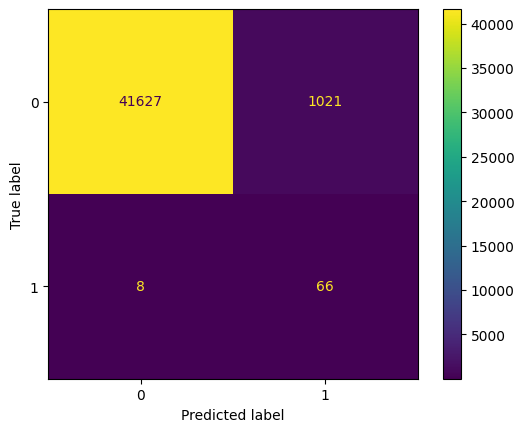

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42648
           1       0.06      0.89      0.11        74

    accuracy                           0.98     42722
   macro avg       0.53      0.93      0.55     42722
weighted avg       1.00      0.98      0.99     42722

roc_auc_score: 0.96
average_precision_score: 0.66


In [158]:
roc_auc, avg_precision, precision, recall, f1_score = metrics(log_model)

eval_df = pd.DataFrame({'model': 'Logistic Regression',
                        'roc_auc_score': roc_auc,
                        'average_precision_score' :avg_precision,
                        'precision': precision,
                        'recall': recall,
                        'f1_score': f1_score}, index= [0])

In [159]:
eval_df

,model,roc_auc_score,average_precision_score,precision,recall,f1_score
0,Logistic Regression,0.96,0.66,0.06,0.89,0.11


The f1-score and precision is quite low due to the hig number of false positives. On the other hand, this model has a decent recall which means that it is identifying most of the fraudulent cases correctly.

### Random Forest Classifier

A Random Forest Classifier is an ensemble learning method used for classification tasks. It constructs multiple decision trees using random subset of data during training and merges their outputs to improve accuracy and control overfitting.

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
# rfc = RandomForestClassifier()

# param_grid = {'n_estimators': [50, 100, 150],
#               'min_samples_split': [2,4,6],
#               'max_features': [5,7,9],
#               'max_depth': [6, 10],
#               'bootstrap': [True],
#               'oob_score': [True],
#               'class_weight': ['balanced_subsample']}

In [162]:
# grid = GridSearchCV(rfc, param_grid)

# grid.fit(scaled_X_train, y_train)

Confusion Matrix:


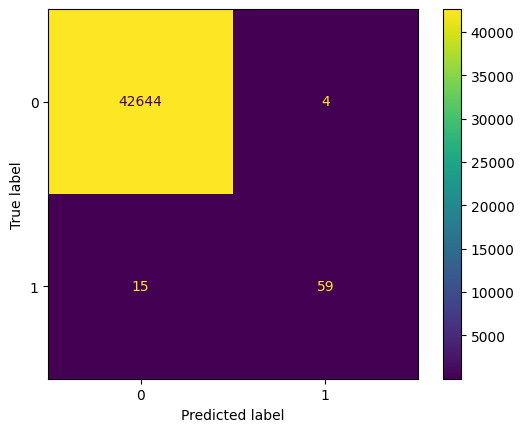

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.94      0.80      0.86        74

    accuracy                           1.00     42722
   macro avg       0.97      0.90      0.93     42722
weighted avg       1.00      1.00      1.00     42722

roc_auc_score: 0.94
average_precision_score: 0.84


In [163]:
rfc = RandomForestClassifier()
# 18 53 2

# rfc = RandomForestClassifier(class_weight='balanced')
# 21 50 2

rfc.fit(scaled_X_train, y_train)

roc_auc, avg_precision, precision, recall, f1_score = metrics(rfc)

In [164]:
_ = ['Random Forest Classifier', roc_auc, avg_precision, precision, recall, f1_score]

eval_df.loc[len(eval_df)] = _
eval_df

,model,roc_auc_score,average_precision_score,precision,recall,f1_score
0,Logistic Regression,0.96,0.66,0.06,0.89,0.11
1,Random Forest Classifier,0.94,0.84,0.94,0.80,0.86


### Boosted Trees
Trying some boosted tree models with the Decision Tree Classifier as the base estimator.

In [165]:
from sklearn.tree import DecisionTreeClassifier

dtc1 = DecisionTreeClassifier()
# dtc2 = DecisionTreeClassifier(class_weight='balanced')

#### AdaBoost Classifier

An AdaBoost Classifier is an ensemble learning technique that combines multiple weak classifiers, typically decision stumps (decision tree model with single split), to create a strong classifier. It works by iteratively training classifiers, each focusing more on the instances that previous classifiers misclassified. The final prediction is a weighted vote of the individual classifiers, improving overall accuracy and robustness.

In [166]:
from sklearn.ensemble import AdaBoostClassifier

In [167]:
# param_grid = {'estimator': [dtc1],
#               'n_estimators': [5,10,15],
#               'learning_rate': [0.4,0.5,0.6]}

# ada = AdaBoostClassifier()
# grid = GridSearchCV(ada,param_grid)
# grid.fit(scaled_X_train,y_train)
# metrics(grid)

In [168]:
# grid.best_params_

Confusion Matrix:


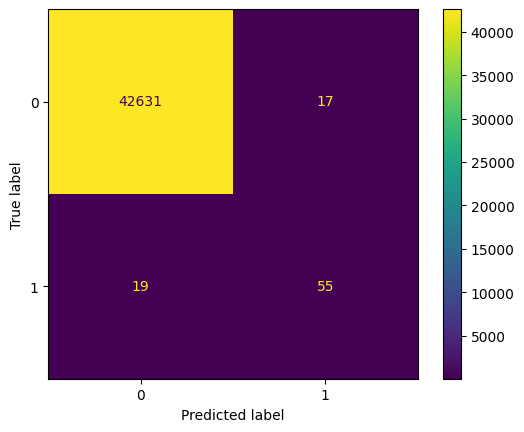

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.76      0.74      0.75        74

    accuracy                           1.00     42722
   macro avg       0.88      0.87      0.88     42722
weighted avg       1.00      1.00      1.00     42722

roc_auc_score: 0.87
average_precision_score: 0.57


In [169]:
# 21 50 17
ada = AdaBoostClassifier(dtc1)
ada.fit(scaled_X_train,y_train)
y_pred = ada.predict(scaled_X_test)
roc_auc, avg_precision, precision, recall, f1_score = metrics(ada)

In [170]:
_ = ['AdaBoost Classifier', roc_auc, avg_precision, precision, recall, f1_score]

eval_df.loc[2] = _
eval_df

,model,roc_auc_score,average_precision_score,precision,recall,f1_score
0,Logistic Regression,0.96,0.66,0.06,0.89,0.11
1,Random Forest Classifier,0.94,0.84,0.94,0.80,0.86
2,AdaBoost Classifier,0.87,0.57,0.76,0.74,0.75


#### Gradient Boosting Classifier

A Gradient Boosting Classifier is an ensemble learning method that builds an additive model by sequentially training a series of weak learners, typically decision trees. Each new tree is trained to correct the errors made by the combined predictions of the previously trained trees, using the gradient of the loss function.

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

Confusion Matrix:


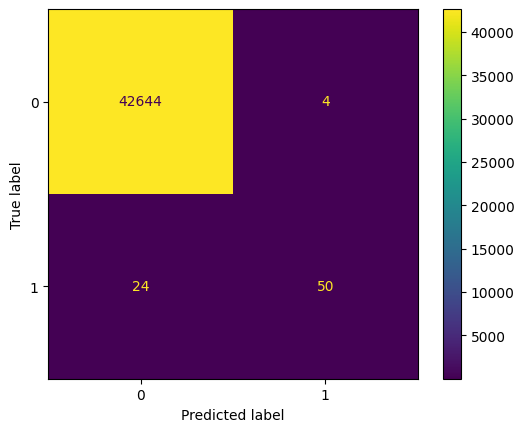

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.93      0.68      0.78        74

    accuracy                           1.00     42722
   macro avg       0.96      0.84      0.89     42722
weighted avg       1.00      1.00      1.00     42722

roc_auc_score: 0.95
average_precision_score: 0.77


In [183]:
# 24 47 7
# gb_model = GradientBoostingClassifier()

gb_model = GradientBoostingClassifier(learning_rate=0.01,max_depth=6)
# 21 50 3

# gb_model = GradientBoostingClassifier(learning_rate=0.001,n_estimators=1000)
gb_model.fit(scaled_X_train,y_train)
roc_auc, avg_precision, precision, recall, f1_score = metrics(gb_model)

In [184]:
_ = ['Gradient Boosting Classifier', roc_auc, avg_precision, precision, recall, f1_score]

eval_df.loc[3] = _
eval_df

,model,roc_auc_score,average_precision_score,precision,recall,f1_score
0,Logistic Regression,0.96,0.66,0.06,0.89,0.11
1,Random Forest Classifier,0.94,0.84,0.94,0.80,0.86
2,AdaBoost Classifier,0.87,0.57,0.76,0.74,0.75
3,Gradient Boosting Classifier,0.95,0.77,0.93,0.68,0.78
4,XGBoost Classifier,0.97,0.84,0.92,0.80,0.86


#### XGBoost Classifier

XGBoost Classifier builds an ensemble of decision trees, optimizing them using gradient boosting principles, with enhancements such as regularization, parallel processing, and efficient handling of missing data.

In [174]:
from xgboost import XGBClassifier

In [175]:
xgb = XGBClassifier(device='cuda',
                    nthread=4,
                    eta=0.3,
                    subsample=0.8,
                    scale_pos_weight=1,
                    max_delta_update=1,
                    eval_metric='aucpr',
                    objective='binary:logistic')

In [176]:
# param_grid = {'eta':[0.3],
#               'subsample':[0.8],
#               'scale_pos_weight':[1,100,590],
#               'max_delta_update':[1]}

# grid = GridSearchCV(xgb,param_grid)

Confusion Matrix:


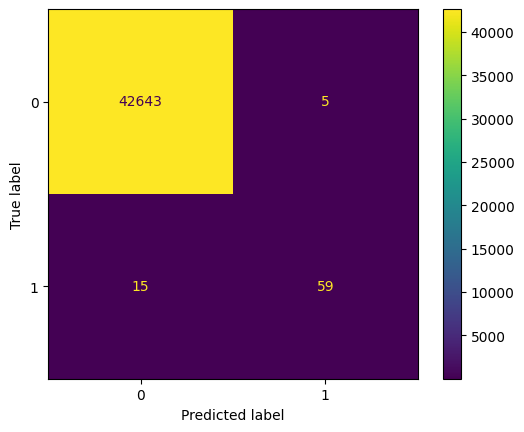

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.92      0.80      0.86        74

    accuracy                           1.00     42722
   macro avg       0.96      0.90      0.93     42722
weighted avg       1.00      1.00      1.00     42722

roc_auc_score: 0.97
average_precision_score: 0.84


In [177]:
xgb.fit(scaled_X_train,y_train)
roc_auc, avg_precision, precision, recall, f1_score = metrics(xgb)

In [178]:
_ = ['XGBoost Classifier', roc_auc, avg_precision, precision, recall, f1_score]

eval_df.loc[4] = _
eval_df

,model,roc_auc_score,average_precision_score,precision,recall,f1_score
0,Logistic Regression,0.96,0.66,0.06,0.89,0.11
1,Random Forest Classifier,0.94,0.84,0.94,0.80,0.86
2,AdaBoost Classifier,0.87,0.57,0.76,0.74,0.75
3,Gradient Boosting Classifier,0.95,0.76,0.92,0.65,0.76
4,XGBoost Classifier,0.97,0.84,0.92,0.80,0.86


In [179]:
# 'unpivoting' the dataframe

melted_eval_df = eval_df.melt(id_vars='model', var_name='metric', value_name='score')

melted_eval_df

,model,metric,score
0,Logistic Regression,roc_auc_score,0.96
1,Random Forest Classifier,roc_auc_score,0.94
2,AdaBoost Classifier,roc_auc_score,0.87
3,Gradient Boosting Classifier,roc_auc_score,0.95
4,XGBoost Classifier,roc_auc_score,0.97
5,Logistic Regression,average_precision_score,0.66
6,Random Forest Classifier,average_precision_score,0.84
7,AdaBoost Classifier,average_precision_score,0.57
8,Gradient Boosting Classifier,average_precision_score,0.76
9,XGBoost Classifier,average_precision_score,0.84


#### Model Comparisons

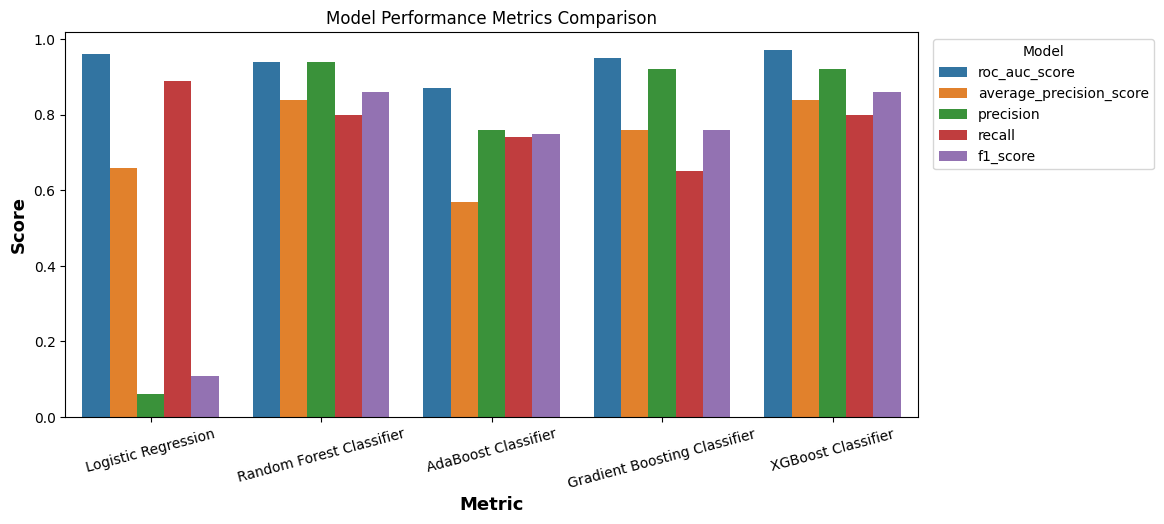

In [180]:
plt.figure(figsize=(11,5))
sns.barplot(data=melted_eval_df, x='model', y='score', hue='metric')
plt.xticks(rotation=15)
plt.title('Model Performance Metrics Comparison')
plt.xlabel('Metric',fontweight='bold',fontsize=13)
plt.ylabel('Score',fontweight='bold',fontsize=13)
plt.legend(title='Model', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [181]:
eval_df

,model,roc_auc_score,average_precision_score,precision,recall,f1_score
0,Logistic Regression,0.96,0.66,0.06,0.89,0.11
1,Random Forest Classifier,0.94,0.84,0.94,0.80,0.86
2,AdaBoost Classifier,0.87,0.57,0.76,0.74,0.75
3,Gradient Boosting Classifier,0.95,0.76,0.92,0.65,0.76
4,XGBoost Classifier,0.97,0.84,0.92,0.80,0.86


### Conclusion

Based on the overall evaluation metric scores, XGBoost and Random Forest Classifier are the best performing models. But if we simply want to focus on the number of fraud cases correctly detected by a model, the Logistic Regression model actually performs the best. It has a recall score of 0.89, which is far better than any of the tree based models.